In [28]:
# Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from obspy.signal.invsim import cosine_taper 


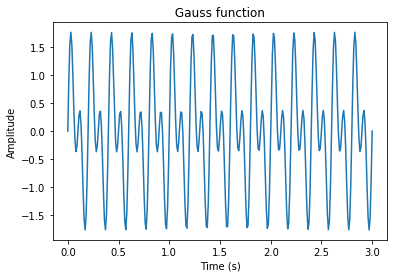

In [29]:
# Let us generate afunction in time (actually the first derivative of it)with two sinudoids
nt = 300   # number of samples
dt = .01      # the sampling interval in s
f0   = 5.     # dominant frequency of the source (Hz)
f1   = 10.     # dominant frequency of the source (Hz)

# Initialize the function
f  = np.zeros(nt + 1)
t = np.linspace(0 * dt, nt * dt, nt)

# Function
f  = np.sin(2*np.pi*f0*t)+ np.sin(2*np.pi*f1*t)

# Let us plot it
plt.plot(t,f)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(' Gauss function ')
plt.show()

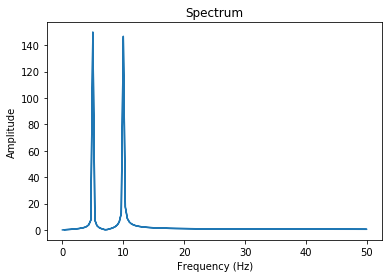

In [30]:
# Calculate and plot spectrum
spec = np.fft.fft(f) # source time function in frequency domain
freq = np.fft.fftfreq(spec.size, d = dt ) # time domain to frequency domain

plt.plot(np.abs(freq), np.abs(spec)) # plot frequency and amplitude
plt.title('Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

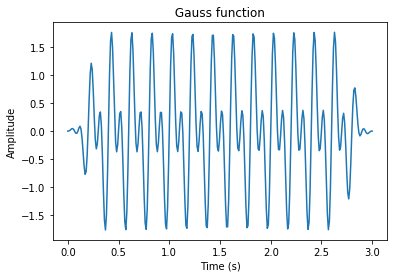

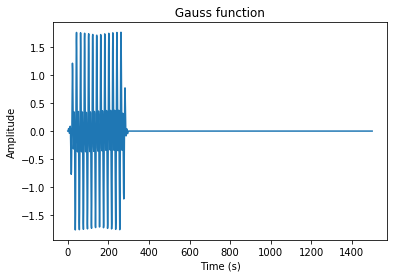

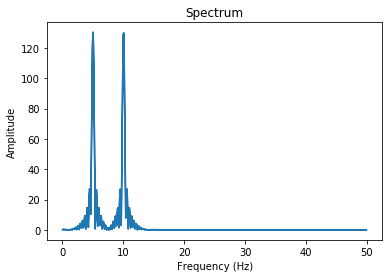

In [31]:
# Taper signal

# Percentage of tapering applied to signal, value between 0.0 and 1.0
taper_percentage = 0.25  # original value: 0.1
taper = cosine_taper(nt, taper_percentage)
f_ = taper * f

# Let us plot it
plt.plot(t,f_)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(' Gauss function ')
plt.show()


# Zero padding

# Initialize the function
f0p  = np.zeros(5*nt + 1)
f0p[0:nt]=f_[0:nt]

# Let us plot it
plt.plot(f0p)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(' Gauss function ')
plt.show()

# Calculate and plot spectrum
spec = np.fft.fft(f0p) # source time function in frequency domain
freq = np.fft.fftfreq(spec.size, d = dt ) # time domain to frequency domain

plt.plot(np.abs(freq), np.abs(spec)) # plot frequency and amplitude
plt.title('Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()